<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cryptocurrency-Analysis-with-Python:-A-Beginner's-Guide-to-the-Simple-Moving-Average-(SMA)-Crossover-Strategy" data-toc-modified-id="Cryptocurrency-Analysis-with-Python:-A-Beginner's-Guide-to-the-Simple-Moving-Average-(SMA)-Crossover-Strategy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cryptocurrency Analysis with Python: A Beginner's Guide to the Simple Moving Average (SMA) Crossover Strategy</a></span><ul class="toc-item"><li><span><a href="#Logaritmic-Returns" data-toc-modified-id="Logaritmic-Returns-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Logaritmic Returns</a></span></li><li><span><a href="#A-simple-Buy-and-Hold-Strategy" data-toc-modified-id="A-simple-Buy-and-Hold-Strategy-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>A simple Buy and Hold Strategy</a></span></li><li><span><a href="#Risk-and-Reward" data-toc-modified-id="Risk-and-Reward-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Risk and Reward</a></span></li><li><span><a href="#Maximum-DrawDown-(MDD)" data-toc-modified-id="Maximum-DrawDown-(MDD)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Maximum DrawDown (MDD)</a></span><ul class="toc-item"><li><span><a href="#Cufflinks" data-toc-modified-id="Cufflinks-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Cufflinks</a></span></li></ul></li><li><span><a href="#Simple-Moving-Average-(SMA)" data-toc-modified-id="Simple-Moving-Average-(SMA)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Simple Moving Average (SMA)</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References:" data-toc-modified-id="References:-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>References:</a></span></li></ul></li></ul></div>

# Cryptocurrency Analysis with Python: A Beginner's Guide to the Simple Moving Average (SMA) Crossover Strategy
Find more tutorials about Computer Vision, Microscopy, Biology and Data Science [here](https://medium.com/@microbioscopicdata)

<p style="text-align: justify;">Welcome back to our tutorial series on Cryptocurrency Analysis with Python! In our previous tutorials, we explored the powerful Python libraries like Matplotlib, mplfinance, and yfinance, which enable us to load and visualize cryptocurrency data from popular sources such as Yahoo Finance. Additionally, we delved into understanding key concepts like returns, rewards, and risk in the context of cryptocurrencies. In this tutorial, we will build upon our knowledge and take our analysis to the next level by implementing a Simple Moving Average (SMA) Crossover Strategy using Python. Don't worry if you're a complete beginner; we'll explain everything from scratch without assuming any prior knowledge.Before we delve into the strategy itself, we will cover crucial concepts such as logarithmic returns, Maximum Drawdown (MDD), and simple moving averages. These foundational concepts play a vital role in making informed decisions in the dynamic cryptocurrency market.</div>
    
![crypto%20Load%20and%20visualize%20Data.jpg](crypto_Load_and_visualize_Data.jpg)

## Logaritmic Returns


<p style="text-align: justify;">There are several ways to set up a trading strategy, and one approach could be to compare prices between cryptocurrencies. However, this comparison faces a challenge due to the nature of prices, as they are typically only positive values. Such a characteristic can complicate the use of certain models and approaches that either require negative values for functioning or produce negative numbers as output [1]. </div>
    
 

![crypto%20understand%20rewards.jpg](crypto_understand_ewards.jpg)

<p style="text-align: justify;">An alternative approach is to use time-series that represent changes in the monetary value/Price of the cryptocurrency, rather than relying on actual values/Prices. These time-series can encompass negative values, making them more suitable for certain models and analyses. Moreover, their statistical properties tend to be more stable than the price time-series used in comparing prices [1]. The most frequently used forms in this alternative approach are relative Returns (Simple returns or Rerurns) and Log-Returns defined as:</div>

![dd](log_returns.jpg)


<p style="text-align: justify;">There are several reasons why Log-Returns are being used in the industry but mostly because Log-returns are additive and this facilitates treatment of our time-series (Simple Returns are not) [2]. We can see the additivity of Log-Returns in the following example: [3].</div>

<p style="text-align: justify;">Suppose cryprocurrency A has a starting price of 100€ and increases to 120€ in the first time period and then goes back to 100€ in the second time period. Going by simple returns, you will get a 20% increase in the first time period and -16.7% decrease in the second time period. If you just add them up  you will get a total return of 4% even though you did not make any money at all. Adding up the Log-Returns over the periods  gives you a total  of 0%. Log-Returns' additivity property ensures that the total return reflects the true result, making them a preferred choice for various financial analyses and decision-making processes.</div>

![table2.png](table2.png)



<p style="text-align: justify;">The code delow downloads historical price data for the cryptocurrency Ethereum (ETH) from January 1, 2018, to present, using yfinance. Next, it calculates (Simple) Returns, and computes Log-Returns using the natural logarithm of the price ratio between the current and previous day. Finally, it creates a time series plot of the Ethereum price data using the "Price" column.</div>

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Price')

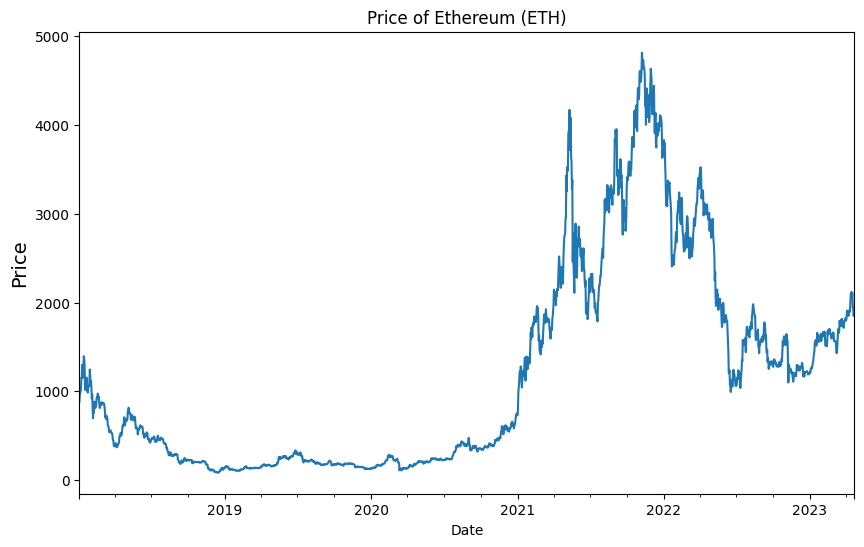

In [23]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the cryptocurrency symbol and the date range
symbol = ['ETH-USD']  # Ethereum
start_date = '2018-01-01'
end_date = '2023-04-24'

# Retrieve the historical price data for the specified cryptocurrency symbols
data = yf.download(symbol, start=start_date, end=end_date)
df = data["Close"].to_frame() #Extracts only the "Close" column
df.rename(columns={"Close":"Price"}, inplace=True) # Rename column

# Calculate (Simple) Returns & Log-Returns
df["(Simple) Returns"]= df["Price"].pct_change()## Calculate (Simple) Returns
df["Log-Returns"]= np.log(df["Price"].div(df["Price"].shift()))## Calculate Log-Returns

# Drop rows with missing values (NaN) resulted from calculating returns
df.dropna(inplace=True)
df.head(3)

df["Price"].plot(title="Price of Ethereum (ETH)", figsize=(10,6))
plt.ylabel("Price", fontsize=14)

## A simple Buy and Hold Strategy
<p style="text-align: justify;">To assess the efficiency of the Simple Moving Average (SMA) Crossover Strategy (discussed in this tutorial), we need a performance metric. A common approach is to compare the strategy's performance with that of the Buy and Hold Strategy, which serves as a benchmark for long-term investment. The simple Buy and Hold approach is among the simplest and most passive investment strategies employed by investors. In this strategy, an investor acquires a cryptocurrency like Ethereum and retains it for an extended period, refraining from frequent buying or selling based on short-term market fluctuations. The primary concept behind the Buy and Hold strategy is to take advantage of the asset's long-term growth potential and profit from the general upward trend in the market.</div>

In [11]:
# Print the sum of Log-Returns
print(df["Log-Returns"].sum())

0.8796252560927598


<p style="text-align: justify;">The above value represents the net logarithmic return for the entire period (from the start_date to the end_date). It can be used to understand the overall performance of the investment in terms of logarithmic returns. However, this value needs to be converted back to (Simple) Returns to better interpret its significance in investment terms.</div>

In [12]:
# Calculate the percentage return
percentage_return = (np.exp(df["Log-Returns"].sum()) - 1) * 100
print(f"The  overall growth/Return of ETH over the entire period is {percentage_return}%")

The  overall growth/Return of ETH over the entire period is 140.9996405705053%


In [32]:
# We can see how the investment grows over time by creating a new column of cumulative returns of an investment based on the Log-Returns 
df["Cumulative Returns"]= df["Log-Returns"].cumsum().apply(np.exp)
print(df.head(3))

                 Price  (Simple) Returns  Log-Returns  Cumulative Returns  \
Date                                                                        
2018-07-20  450.697998         -0.040290    -0.041124            0.959710   
2018-07-21  462.436005          0.026044     0.025711            0.984705   
2018-07-22  459.657013         -0.006009    -0.006028            0.978787   

            Cumulative Max    SMA (50)   SMA (200)  
Date                                                
2018-07-20        1.807334  497.919578  694.289966  
2018-07-21        1.807334  495.567438  692.179926  
2018-07-22        1.807334  492.924418  689.664611  


## Risk and Reward

As we have discussed [previously](https://medium.com/coinmonks/cryptocurrency-analysis-with-python-understanding-normalization-returns-rewards-and-risk-7e4d530c917) there are various performance metrics to evaluate an investment or portfolio in the world of cryptocurrencies. Among the most commonly used metrics are Reward and Risk (volatility), which are typically measured using the mean (average) and standard deviation of returns, respectively.

<p style="text-align: justify;">The code below calculate the daily and annualized mean Return and Risk for Ethereum. Having a positive reward means that, on average, the investment has yielded a profit over the specified time period. Having high Risk  indicates that the cryptocurrency's price is more prone to significant fluctuation.</div

In [28]:
# Calculate the reward
df["Log-Returns"].mean()
# Calculate the annualized reward
df["Log-Returns"].mean() * 365.25
# Calculate the risk
df["Log-Returns"].std()
# Calculate the annualized risk
df["Log-Returns"].std()* np.sqrt(365.25)

0.9528790576892595

## Maximum DrawDown (MDD)  

<p style="text-align: justify;">Another usefull metric for measuring extreme negative outcomes is the maximum drawdown (MDD). MDD is a crucial principle in finance, representing the most substantial decline (loss) in the value of an investment or portfolio from its highest peak to the lowest trough over a specified period. It offers valuable information about the most significant loss an investor could have encountered during that particular timeframe (higher the maximum drawdown higher the risk for an investment) [4].</div>

<p style="text-align: justify;">For our cryptocurrency, Ethereum (time period: 2018-Present) the maximum drawdown is 504%, it means that at its worst point during this period, the value of Ethereum declined by 504% from its previous highest peak. Such large drawdowns can be particularly challenging for investors, as recovering from such losses requires significant subsequent gains!</div>

<p style="text-align: justify;">The code below calclates the  maximum drawdown (MDD) for the cryptocurrency Ethereum over the period from 2018 to the present and visualizes it on a plot. To calculate MDD, we use the  `cummax()` method to track the highest value of the Cumulative Returns over time. </div>

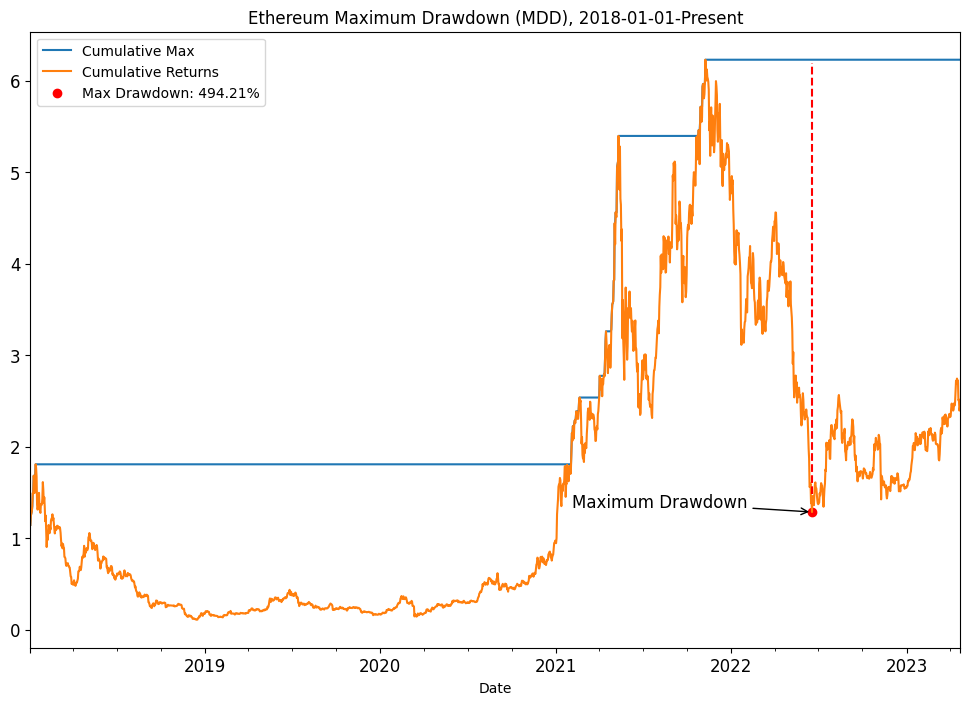

In [29]:
# Calculate the cumulative maximum with the method cummax
df['Cumulative Max'] = df['Cumulative Returns'].cummax()

# Create the plot
ax = df[['Cumulative Max', 'Cumulative Returns']].plot(title=f"Ethereum Maximum Drawdown (MDD), {start_date}-Present", figsize=(12, 8), fontsize=12)

max_drawdown = (df['Cumulative Max'] -df['Cumulative Returns'])

# Plot the maximum drawdown value as a point on the plot
max_drawdown_value = max_drawdown.max()
max_drawdown_index = max_drawdown.idxmax()
ax.scatter(max_drawdown_index, (df['Cumulative Max'].max()-max_drawdown_value), color='red', label=f'Max Drawdown: {max_drawdown_value:.2%}')
ax.axvline(max_drawdown_index, ymin=0.25, ymax=0.95, color='red', linestyle='--')

# Annotate the maximum drawdown point with text
ax.annotate("Maximum Drawdown", xy=(max_drawdown_index, df['Cumulative Max'].max() - max_drawdown_value),
            xytext=(max_drawdown_index - pd.Timedelta(days=500), df['Cumulative Max'].max() - max_drawdown_value + 0.05),
            arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=12)

# Add labels and legend
plt.legend()

### Cufflinks

In order to deploy the SMA Crossover strategy we need to use another vissualization tool, Cufflinks. Cufflinks is a Python library that provides an interface between Plotly and Pandas, allowing users to create interactive visualizations directly from Pandas DataFrames. It simplifies the process of creating attractive and interactive charts by providing a high-level API that works seamlessly with Plotly [5].

In [30]:
# !pip install cufflinks#install the required libraries 'plotly' and 'cufflinks'
import cufflinks as cf
#set the configuration for Cufflinks to use the 'offline' mode, visualizations  will be rendered locally in the notebook
cf.set_config_file(offline=True)
data # previously downloaded

# Create a QuantFig object qf from the data
qf = cf.QuantFig(data)
qf.add_volume(colorchange=False) #add the volume bars to the candlestick chart
# Generate the interactive plot
qf.iplot(title = "BTC Price",name = "BTC Price", kind='candlestick' )

## Simple Moving Average (SMA)
<p style="text-align: justify;">Traders use a variety of moving averages (MAs) in their technical analysis to smooth out price data identify price trends and changes.  A simple moving average (SMA) is the most basic type of moving average and the simplest, so it is considered a core technical analysis indicator [6].  When plotted on a price chart, the SMA appears as a line that adjusts as new price data becomes available [6]. Its ease of calculation makes (see figure below) it highly popular among traders and analysts. The formula to compute SMA involves summing up the prices over the selected time period and then dividing the sum by the number of periods.</div>

![](sma1.png)

The SMA line aims to smooth out the price volatility to make it easier to determine the market direction. The two most common Simple Moving Averages (SMAs) are the SMA(50) and SMA(200).


- SMA(50) [50-Day Simple Moving Average] represents the average closing price of an asset over the past 50 trading days. It is a short-term moving average and provides a more responsive indication of recent price trends. Traders often use SMA(50) to gauge the short-term momentum of an asset and identify potential short-term trends or reversals.

- SMA(200) [200-Day Simple Moving Average] represents the average closing price of an asset over the past 200 trading days. It is a long-term moving average and provides a smoother indication of long-term price trends. SMA(200) is commonly used to identify the long-term trend of an asset and determine whether it is in an uptrend or a downtrend.

The code below calculates and plots, by using the `rolling()` function, two Simple Moving Averages (SMAs): 
- a 50-day SMA 
- and a 200-day SMA. 

                 Price  (Simple) Returns  Log-Returns  Cumulative Returns  \
Date                                                                        
2019-02-04  107.821602          0.003060     0.003055            0.229594   
2019-02-05  107.443520         -0.003507    -0.003513            0.228789   
2019-02-06  104.919289         -0.023494    -0.023774            0.223414   

            Cumulative Max    SMA (50)   SMA (200)  
Date                                                
2019-02-04        1.807334  124.898744  208.535758  
2019-02-05        1.807334  125.144938  206.819486  
2019-02-06        1.807334  125.221074  205.031902  


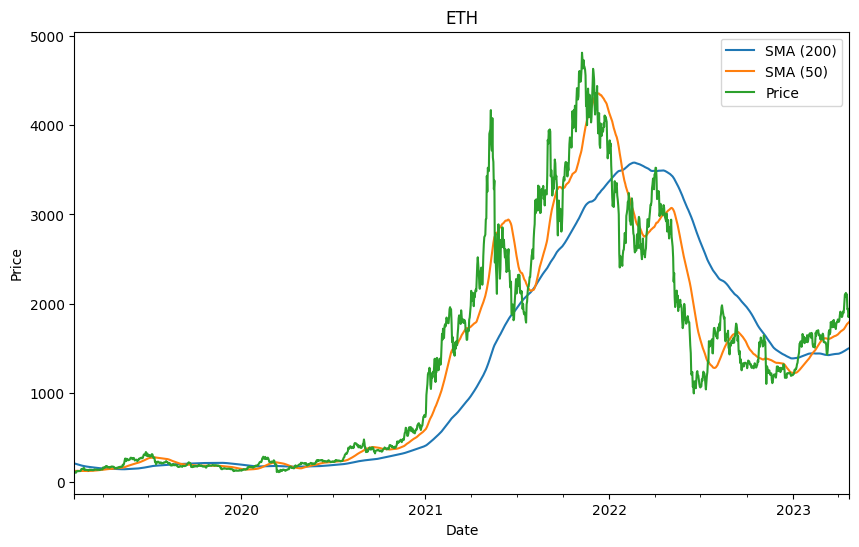

In [33]:
df["SMA (50)"] = df["Price"].rolling(50).mean()
df["SMA (200)"]= df["Price"].rolling(200).mean()
df.dropna(inplace=True)
df[["SMA (200)","SMA (50)", "Price"]].plot(title = "ETH" , figsize=(10,6))
# Set y-axis title
plt.ylabel("Price")
print(df.head(3))

## Conclusions

<p style="text-align: justify;">In this first part of our tutorial, we covered vital concepts such as logarithmic returns, Maximum Drawdown (MDD), and simple moving averages, which are essential tools for making informed decisions in the dynamic cryptocurrency market. We also introduced the Simple Buy and Hold Strategy, a straightforward and passive investment approach, as a benchmark for comparison with our upcoming Simple Moving Average (SMA) Crossover Strategy. In the next part (part 2) of this tutorial, we will dive into the exciting world of the SMA Crossover Strategy. By implementing this strategy and performing backtesting, we will explore if can  outperform the Buy and Hold Strategy.See you in the next part!</div>

I have prepared a Jupyter Notebook to accompany this blog post, which can be viewed in my GitHub.

If you enjoy reading stories of this nature and wish to show your support for my writing, you may contemplate becoming a Medium member. By subscribing for just $5 per month, you’ll gain boundless entry to a vast collection of Python guides and Data science articles. Additionally, if you choose to sign up through my referral link, I’ll receive a modest commission with no extra cost to you.


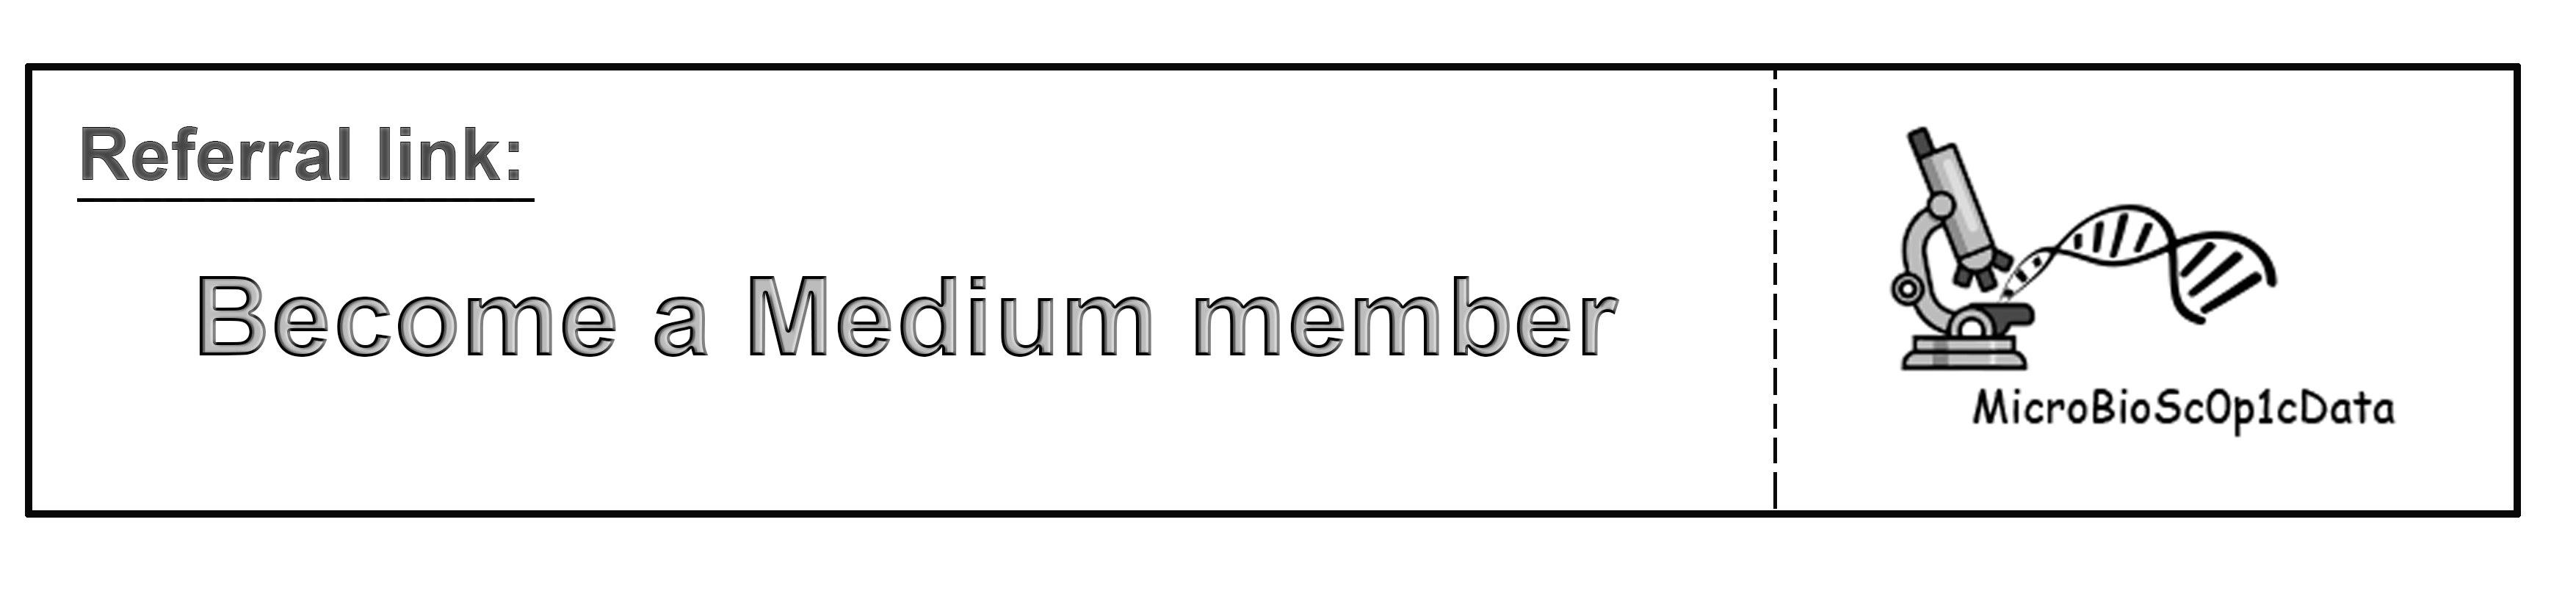

## References:
[1]	“Python for Finance, Part 2: Intro to Quantitative Trading Strategies.” https://www.learndatasci.com/tutorials/python-finance-part-2-intro-quantitative-trading-strategies/ (accessed Jul. 25, 2023).  

[2]	R. Hudson and A. Gregoriou, “Calculating and Comparing Security Returns is Harder than you Think: A Comparison between Logarithmic and Simple Returns.” Rochester, NY, Feb. 07, 2010. doi: 10.2139/ssrn.1549328.  

[3]	“Magic of Log Returns: Concept – Part 1,” AllQuant, Mar. 03, 2023. https://www.allquant.co/post/magic-of-log-returns-concept-part-1 (accessed Jul. 25, 2023).  

[4]	“Maximum Drawdown (MDD) Defined, With Formula for Calculation,” Investopedia.   
https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp (accessed Jul. 26, 2023).  

[5]	J. Santos, “santosjorge/cufflinks.” Jul. 25, 2023. Accessed: Jul. 26, 2023. [Online]. Available: https://github.com/santosjorge/cufflinks  

[6]	“Simple Moving Average (SMA): Definition and Examples | FXOpen,” Market Pulse, Apr. 26, 2023. https://fxopen.com/blog/en/simple-moving-average-sma-definition-and-examples/ (accessed Jul. 26, 2023).

